教師なし学習とは、学習データに正解を与えない状態で学習させる手法です。
たとえば大量のメールを教師なし学習で学習すると、文章の特徴が似ているか否かを導きグループ分けできます。

教師あり学習のように、メールが通常メールか迷惑メールかというような正解を与えて学習するわけではないため、そのグループがなにを示すのかは解釈が必要です。

<img src='教師なしメール.png'>

## 教師なし学習の代表的なアルゴリズム

教師なし学習といっても、さまざまなアルゴリズムが存在します。ここでは代表例として、以下の4種類を紹介します。

- GAN（敵対的生成ネットワーク）
- クラスタリング
- 主成分分析
- アソシエーション分析

### [GNA](https://www.skillupai.com/blog/tech/mldl-tips-1/)
GANは、Generator（生成者）とDiscriminator（判定者）の2つのネットワークが競合することで学習される手法です。Generatorが入力データに似た画像を生成し、Discriminatorはそれが訓練データか、もしくはGeneratorが生成した画像かを判定します。これが繰り返されることで学習が行われます。

<img src='GAN.png'>

### クラスタリング
クラスタリングはデータ間の類似度にもとづいて、データをグループ分けする手法です。活用例として、顧客情報をクラスタリングして顧客をグループ分けし、同じグループ内で同じ商品が複数回購入された場合、その顧客と同じグループに属している人たちにもレコメンドするといった方法があります。

<img src='クラスタリング.png'>

### 主成分分析（PCA）
主成分分析とは多種類のデータを集約する手法です。

たとえば甘み、苦味、酸味、コクなどデータの種類が多いとき、主成分分析により、もとの情報をできるだけ損なわない、集約されたデータでの表現が可能です。主成分分析で出力されたデータが何を示しているかは、人が解釈を与える必要があります。

アンケートの各項目の評価結果から総合評価を導くといった活用方法があります。

<img src='PCA.png'>

## バスケット分析（アソシエーション分析）とは？

ある事象と"同時に発生する事象"が何かを分析する手法。

ex.)消費者が「ある商品」を購入した際に、よく一緒に買われている商品は何か？


## よく使用される指標

### ・Confidence（信頼度）
「リンゴを買った人のうち、どれくらいの人がミカンも買ったか」という確率

### ・Support（支持度）
「そもそもリンゴとミカンを一緒に買った人がどのくらいいるのか」という指標

### ・Lift（リフト）
「そもそもミカン自体がどれだけ売れているのか」という指標


## Aprioriアルゴリズム
実際は1対1だけでなく、「リンゴとミカンを買った人がモモをどれだけ買うか」、のような多対多の関係性もある。

・・・が、商品数が多くなってくるとそこまですべて計算するのはほぼ無理なので、この計算を高速で行うためのアルゴリズム。

In [17]:
#データの読み込み＆整形
import pandas as pd

df_sales = pd.read_csv("9-8_basket.csv",index_col="名前")
df_sales = df_sales.fillna(False).replace("○",True)

In [20]:
display(df_sales)

,りんご,みかん,すいか,メロン,もも,バナナ,なし
名前,,,,,,,
Aさん,True,True,False,False,True,False,False
Bさん,False,True,False,True,False,False,False
Cさん,False,False,True,False,True,True,True
Dさん,False,True,False,True,False,True,False
Eさん,True,False,False,False,False,False,False
Fさん,True,True,True,False,True,True,False
Gさん,False,False,True,True,False,True,False
Hさん,False,True,False,False,True,False,True
Iさん,True,False,False,False,False,False,True


#### データ加工

In [10]:
# 発注番号と商品番号をキーに商品個数を集計する
w1 = df.groupby(['発注番号', '商品番号'])['商品個数'].sum()

# 結果確認
print(w1.head())

発注番号    商品番号 
536370  10002    48
        21035    18
        21724    12
        21731    24
        21791    24
Name: 商品個数, dtype: int64


In [13]:
# mlxtend の導入
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.0 MB/s eta 0:00:00a 0:00:01


In [21]:
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

#aprioriでまずsupportが高い単品or組み合わせを選出
freq_items = apriori(df_sales, min_support=0.1, use_colnames=True)

#上で選ばれた組み合わせの中でliftが高い組み合わせを選出
freq_items_top = association_rules(freq_items, metric = "lift",min_threshold = 1.5)

freq_items_top

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(バナナ),(みかん),0.3077,0.3846,0.1923,0.6250,1.6250,0.0740,1.6410,0.5556
1,(みかん),(バナナ),0.3846,0.3077,0.1923,0.5000,1.6250,0.0740,1.3846,0.6250
2,(バナナ),(すいか),0.3077,0.3077,0.1538,0.5000,1.6250,0.0592,1.3846,0.5556
3,(すいか),(バナナ),0.3077,0.3077,0.1538,0.5000,1.6250,0.0592,1.3846,0.5556
4,"(りんご, もも)",(みかん),0.1923,0.3846,0.1154,0.6000,1.5600,0.0414,1.5385,0.4444
5,"(りんご, みかん)",(もも),0.1923,0.3462,0.1154,0.6000,1.7333,0.0488,1.6346,0.5238
6,(もも),"(りんご, みかん)",0.3462,0.1923,0.1154,0.3333,1.7333,0.0488,1.2115,0.6471
7,(みかん),"(りんご, もも)",0.3846,0.1923,0.1154,0.3000,1.5600,0.0414,1.1538,0.5833
8,"(バナナ, りんご)",(みかん),0.1538,0.3846,0.1154,0.7500,1.9500,0.0562,2.4615,0.5758
9,"(りんご, みかん)",(バナナ),0.1923,0.3077,0.1154,0.6000,1.9500,0.0562,1.7308,0.6032


In [26]:
#図にして表示
import networkx as nx
import matplotlib.pyplot as plt

# 親ノードの抽出
ant = freq_items_top['antecedents'].values
ant = [tuple(x) for x in ant]

# 子ノードの抽出
con = freq_items_top['consequents'].values
con = [tuple(x) for x in con]

# 全ノードのリストアップ
both = list(set(ant + con))

both

[('なし',),
 ('みかん', 'もも'),
 ('すいか',),
 ('りんご', 'もも'),
 ('バナナ', 'もも'),
 ('バナナ', 'みかん'),
 ('バナナ',),
 ('もも',),
 ('りんご', 'みかん'),
 ('りんご', 'なし'),
 ('バナナ', 'りんご'),
 ('りんご', 'すいか'),
 ('みかん',)]

In [27]:
# 関係グラフの初期化
G = nx.DiGraph()

# ノードの追加
for n in both:
    G.add_node(n)

# エッジの追加
for i in range(len(freq_items_top)):
    item = freq_items_top.loc[i]
    ant = tuple(item['antecedents'])
    con = tuple(item['consequents'])
    G.add_edge(ant, con)

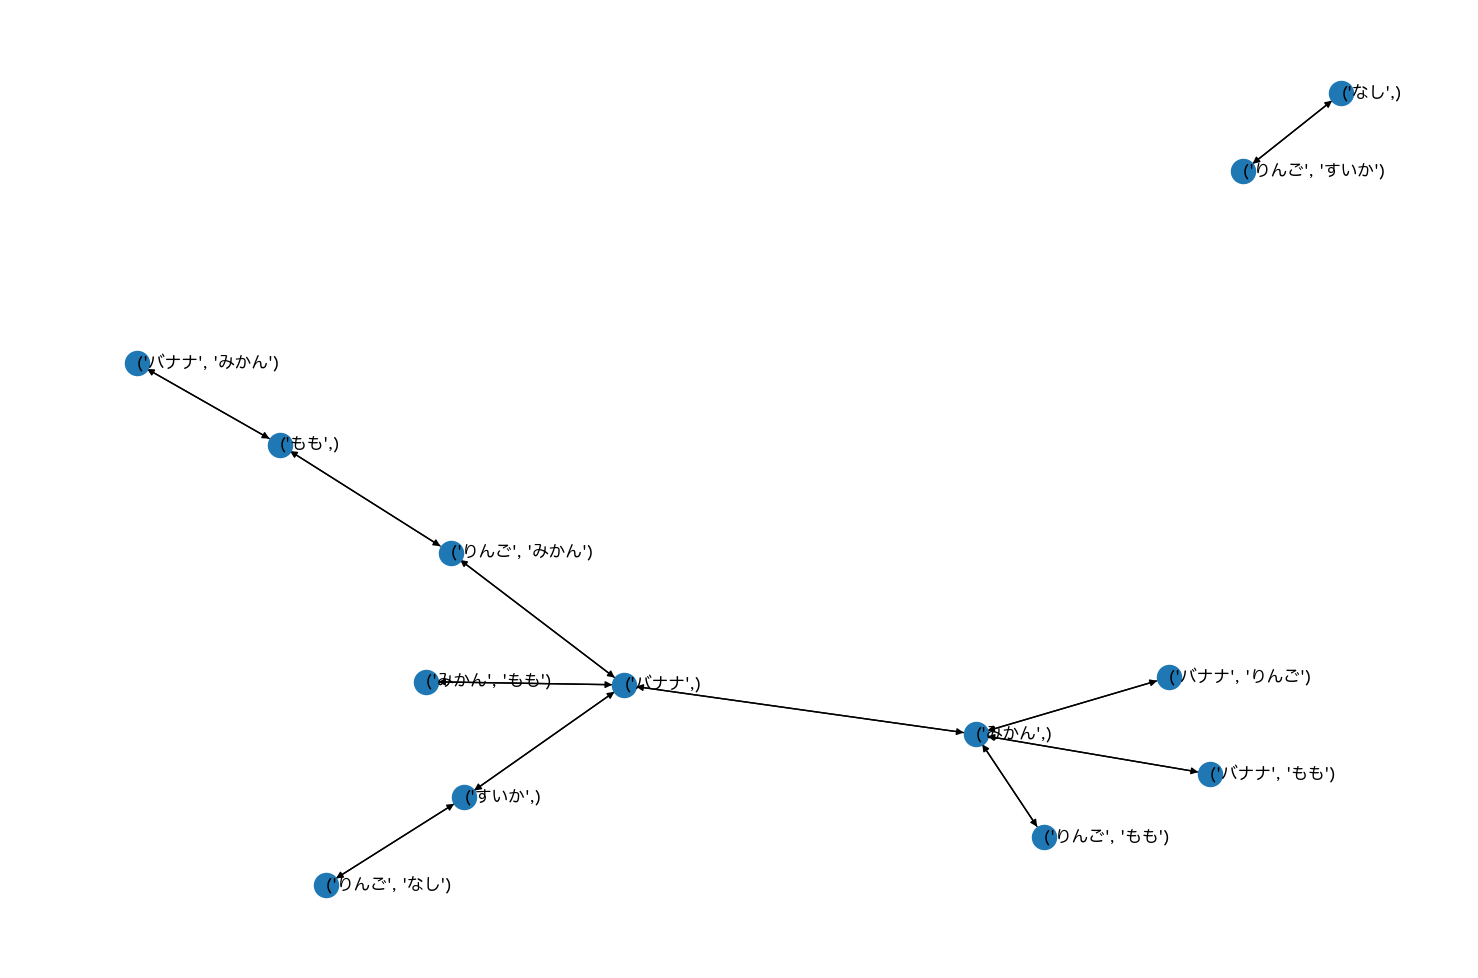

In [28]:
#グラフの描画
pos = nx.spring_layout(G,seed=1)

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos,
    horizontalalignment='left', 
    verticalalignment='center',font_family='Hiragino Maru Gothic Pro')
plt.axis('off')
plt.tight_layout()
plt.show()